In [1]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
##set display to maximum 190 columns and 190 rows
pd.set_option('display.max_rows', 190)
pd.set_option('display.max_columns', 190)

In [3]:
##load the data sets
train_set = pd.read_csv('mitbih_train.csv', header = None)
test_set = pd.read_csv('mitbih_test.csv', header = None)

In [62]:
##checking head of train data
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,Output
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032

In [4]:
## renaming the output column for train and test set
train_set.rename(columns={187 : "Output"}, inplace=True)
test_set.rename(columns={187 : "Output"}, inplace=True)

### Basic EDA of train and test set

In [5]:
####checking shape####
print(train_set.shape)
print(test_set.shape)

(87554, 188)
(21892, 188)


In [6]:
##checking head of trainset
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,Output
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032

In [7]:
##checking head of testset
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,Output
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,0.121901,0.107438,0.105372,0.097107,0.105372,0.099174,0.105372,0.099174,0.107438,0.107438,0.115702,0.111570,0.121901,0.111570,0.119835,0.111570,0.113636,0.111570,0.121901,0.105372,0.107438,0.101240,0.101240,0.086777,0.092975,0.084711,0.082645,0.078512,0.078512,0.070248,0.076446,0.068182,0.078512,0.070248,0.068182,0.068182,0.074380,0.072314,0.090909,0.101240,0.107438,0.105372,0.121901,0.115702,0.109504,0.097107,0.103306,0.097107,0.086777,0.072314,0.070248,0.053719,0.057851,0.049587,0.057851,0.051653,0.055785,0.053719,0.053719,0.000000,0.012397,0.188017,0.681818,0.975207,0.615702,0.041322,0.012397,0.086777,0.066116,0.066116,0.051653,0.039256,0.043388,0.033058,0.041322,0.035124,0.045455,0.041322,0.045455,0.043388,0.049587,0.047521,0.06405,0.068182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,0.373626,0.366300,0.318681,0.311355,0.326007,0.311355,0.315018,0.322344,0.344322,0.344322,0.333333,0.304029,0.307692,0.282051,0.271062,0.285714,0.263736,0.274725,0.282051,0.267399,0.278388,0.289377,0.293040,0.289377,0.289377,0.289377,0.293040,0.282051,0.267399,0.256410,0.252747,0.216117,0.223443,0.238095,0.216117,0.267399,0.417582,0.582418,0.615385,0.622711,0.761905,0.864469,1.000000,0.908425,0.673993,0.315018,0.153846,0.120879,0.098901,0.043956,0.021978,0.021978,0.029304,0.000000,0.010989,0.029304,0.014652,0.021978,0.043956,0.087912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,0.092920,0.106195,0.106195,0.123894,0.097345,0.123894,0.119469,0.141593,0.132743,0.154867,0.146018,0.168142,0.159292,0.163717,0.168142,0.168142,0.163717,0.181416,0.185841,0.199115,0.176991,0.203540,0.190265,0.203540,0.194690,0.212389,0.203540,0.2

as we move from column 1 to column 186. columns are becoming more and more redundent.. most of the values in last columns are 0

In [8]:
##checking data types of trainset columns
train_set.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
10        float64
11        float64
12        float64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
53        float64
54        float64
55        

In [9]:
##checking data types of testset columns
test_set.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
10        float64
11        float64
12        float64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
53        float64
54        float64
55        

all values in train and test set are float so no need to change datatype of any column

In [10]:
##checking 5 point summary of trainset
train_set.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,Output
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.203550,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.313890,0.318454,0.322087,0.324891,0.326737,0.327817,0.327931,0.326746,0.324326,0.320537,0.316234,0.311407,0.306520,0.301696,0.297087,0.292225,0.287838,0.283965,0.280724,0.278051,0.276432,0.275132,0.274152,0.273004,0.272354,0.271696,0.271413,0.271276,0.271590,0.272307,0.273436,0.274492,0.275570,0.276823,0.278993,0.281349,0.282139,0.280225,0.276547,0.272064,0.268006,0.264239,0.260910,0.257082,0.254712,0.254155,0.255646,0.257813,0.259830,0.259958,0.258528,0.256549,0.255682,0.254850,0.253470,0.251946,0.250425,0.247326,0.241640,0.234124,0.226143,0.218646,0.212149,0.207332,0.204524,0.202845,0.201995,0.201829,0.201814,0.200801

In [11]:
##checking 5 point summary of testset
test_set.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,Output
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.00000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000
mean,0.894410,0.761902,0.426627,0.221596,0.201676,0.209891,0.204805,0.200992,0.197634,0.196022,0.197905,0.202436,0.207303,0.211524,0.216840,0.223455,0.229845,0.235463,0.240701,0.245976,0.251751,0.257664,0.263788,0.270541,0.276921,0.283179,0.289342,0.295346,0.301180,0.306478,0.311708,0.316235,0.319868,0.322814,0.324713,0.325812,0.325856,0.324729,0.322518,0.319147,0.314855,0.310225,0.305542,0.300982,0.296350,0.291536,0.286786,0.282781,0.279584,0.277027,0.275559,0.274737,0.273778,0.273017,0.272631,0.272304,0.271872,0.271924,0.272503,0.272996,0.273770,0.275001,0.275591,0.276273,0.278021,0.280608,0.281343,0.279012,0.275286,0.270615,0.266328,0.262954,0.259200,0.255996,0.253787,0.252855,0.254643,0.257568,0.259574,0.258810,0.257191,0.256110,0.254448,0.252837,0.251832,0.251517,0.250856,0.248665,0.243113,0.235150,0.226338,0.217965,0.211105,0.206363,0.203872,0.202704,0.201279,0.200522,0.200317,0.199521,

after column 108 minimum value, 1st qunatile, median vlaue and 3rd quantile are comming zero. so mostly values are zero we can drop columns after 108. those will not help to classify the signals

### checking and dealing with missing values

In [12]:
##checking null values in trainset
train_set.isnull().any()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
53        False
54        False
55        False
56        False
57        False
58        False
59        False
60        False
61        False
62      

In [13]:
##checking null values in test set
test_set.isnull().any()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
53        False
54        False
55        False
56        False
57        False
58        False
59        False
60        False
61        False
62      

since there is no missing value in both trainset and test set so no need to treat any missing value. if there could be any missing value, we can replace continious values with mean/meadian and for categorical values with mode or can drop them.

### checking unique classes of output variable

In [14]:
##checking unique vlaues of dependent variable in trainset
pd.unique(train_set["Output"])

array([0., 1., 2., 3., 4.])

In [15]:
##checking unique vlaues of dependent variable in test set
pd.unique(test_set["Output"])

array([0., 1., 2., 3., 4.])

In both the data sets (train and test) there are 5 classes in output variable.. so its a multiclass classification problem.

### creating x_train, x_test, y_train and y_test

In [16]:
##creating x_train and x_test variable from datasets
x_train = train_set.drop('Output', axis='columns')
x_test = test_set.drop('Output', axis='columns')

In [17]:
## creating y_train and y_test
y_train = train_set["Output"]
y_test = test_set["Output"]

### outlier checking and treatment

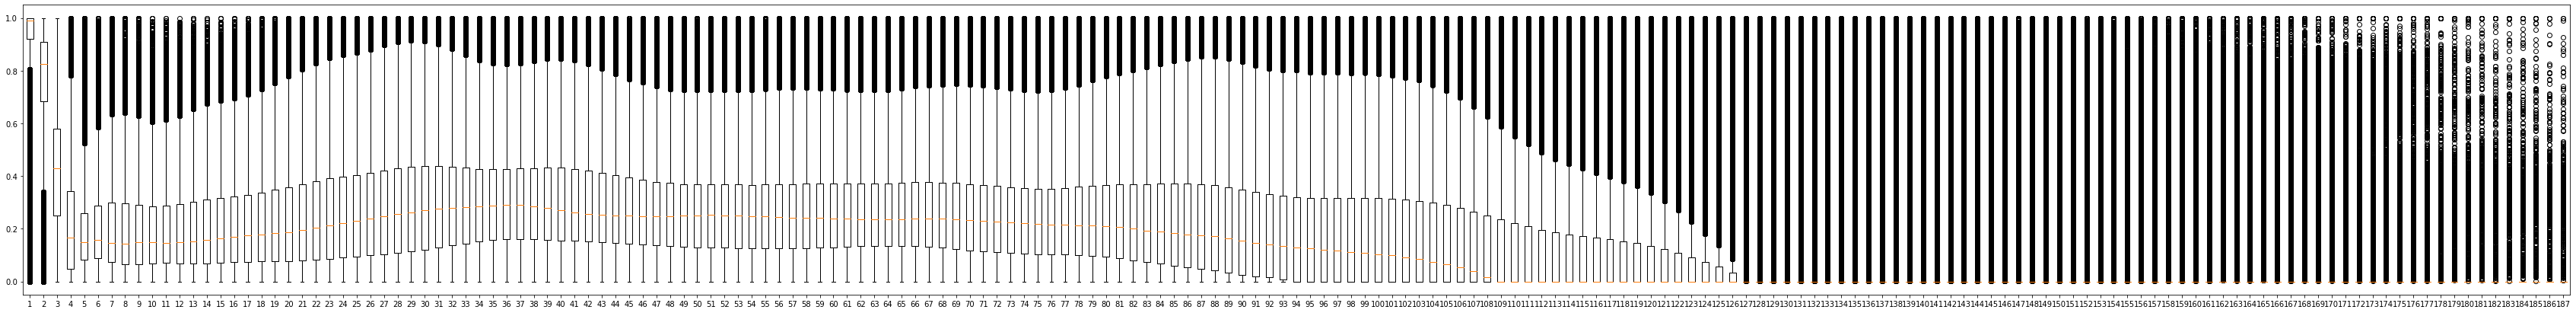

In [18]:
##checking outliers in trainset
fig = plt.figure(figsize =(60, 7))
plt.boxplot(x_train)
plt.show()

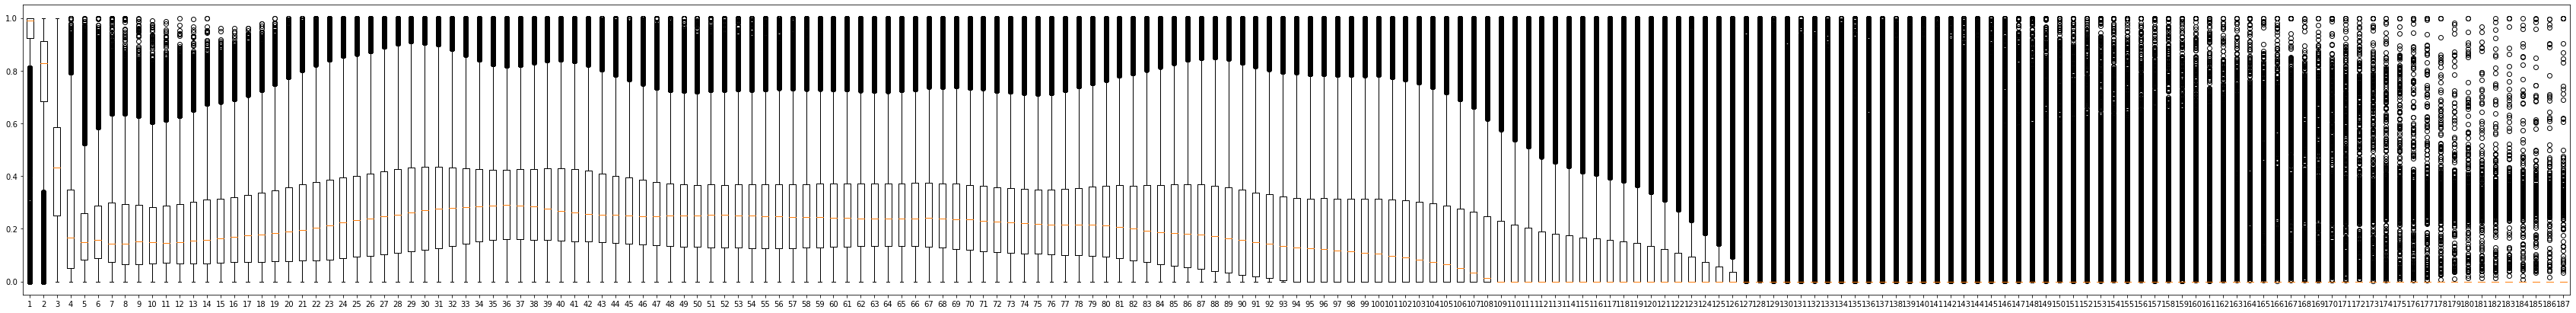

In [19]:
##checking outliers in test set
fig = plt.figure(figsize =(60, 7))
plt.boxplot(x_test)
plt.show()

as we can see from description of data and outlier graph after 105 column mostly values are 0 and has too many outliers so will remove these columns. these will not help to predict the outcome.

In [21]:
## removing columns from 105 to 187
column_drop = [i for i in range(105,187)]
x_train.drop(columns=column_drop,inplace=True)
x_test.drop(columns=column_drop,inplace=True)

In [22]:
## again checking the head of columns in train set
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032432,0.043243,0.037838,0.051351,0.029730,0.048649,0.029730,0.056757,0.051351,0.078378,0.064865,0.094595,0.097297,0.116216,0.094595,0.091892,0.064865,0.067568,0.040541,0.048649,0.018919,0.021622,0.008108,0.029730,0.010811,0.021622,0.005405,0.032432,0.018919,0.021622,0.040541,0.240541,0.589189,0.964865,0.583784,0.121622,0.000000,0.035135,0.035135,0.027027,0.021622,0.029730,0.010811,0.032432,0.021622,0.051351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,0.000000,0.005525,0.022099,0.066298,0.080110,0.058011,0.060773,0.058011,0.099448,0.124309,0.174033,0.196133,0.229282,0.240331,0.265193,0.237569,0.218232,0.198895,0.198895,0.198895,0.171271,0.162983,0.185083,0.196133,0.171271,0.140884,0.085635,0.000000,0.005525,0.002762,0.035912,0.049724,0.063536,0.110497,0.121547,0.138122,0.140884,0.168508,0.389503,0.765193,1.000000,0.853591,0.668508,0.458564,0.320442,0.193370,0.121547,0.080110,0.082873,0.071823,0.058011,0.066298,0.088398,0.096685,

In [23]:
## again checking the head of column in test set.
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,0.121901,0.107438,0.105372,0.097107,0.105372,0.099174,0.105372,0.099174,0.107438,0.107438,0.115702,0.111570,0.121901,0.111570,0.119835,0.111570,0.113636,0.111570,0.121901,0.105372,0.107438,0.101240,0.101240,0.086777,0.092975,0.084711,0.082645,0.078512,0.078512,0.070248,0.076446,0.068182,0.078512,0.070248,0.068182,0.068182,0.074380,0.072314,0.090909,0.101240,0.107438,0.105372,0.121901,0.115702,0.109504,0.097107,0.103306,0.097107,0.086777,0.072314,0.070248,0.053719,0.057851,0.049587,0.057851,0.051653,0.055785,0.053719,0.053719,0.000000,0.012397,0.188017,0.681818,0.975207,0.615702
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,0.373626,0.366300,0.318681,0.311355,0.326007,0.311355,0.315018,0.322344,0.344322,0.344322,0.333333,0.304029,0.307692,0.282051,0.271062,0.285714,0.263736,0.274725,0.282051,0.267399,0.278388,0.289377,0.293040,0.289377,0.289377,0.289377,0.293040,0.282051,0.267399,0.256410,0.252747,0.216117,0.223443,0.238095,0.216117,0.267399,0.417582,0.582418,0.615385,0.622711,0.761905,0.864469,1.000000,0.908425,0.673993,0.315018,0.153846,0.120879,0.098901,0.043956,0.021978,0.021978,0.029304,0.000000,0.010989,0.029304,0.014652,0.021978,0.043956,0.087912,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,0.092920,0.106195,0.106195,0.123894,0.097345,0.123894,0.119469,0.141593,0.132743,0.154867,0.146018,0.168142,0.159292,0.163717,0.168142,0.168142,0.163717,0.181416,0.185841,0.199115,0.176991,0.203540,0.190265,0.203540,0.194690,0.212389,0.203540,0.212389,0.212389,0.225664,0.238938,0.283186,0.305310,0.393805,0.451327,0.433628,0.371681,0.358407,0.274336,0.216814,0.181416,0.185841,0.185841,0.185841,0.194690,0.225664,0.181416,0.225664,0.668142,1.000000,0.460177,0.190265,0.203540,0.207965,0.194690,0.207965,0.194690,0.185841,0.194690,0.212389,0.207965,0.216814,0.207965,0.225664,0.216814
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,0.341667,0.345833,0.352083,0.354167,0.345833,0.345833,0.347917,0.341667,0.341667,0.343750,0.343750,0.341667,0.337500,0.341667,0.360417,0.358333,0.358333,0.352083,0.356250,0.358333,0.343750,0.304167,0.287500,0.270833,0.266667,0.260417,0.262500,0.256250,0.268750,0.260417,0.264583,0.268750,0.270833,0.270833,0.275000,0.272917,0.279167,0.281250,0.281250,0.283333,0.277083,0.260417,0.318750,0.481250,0.614583,0.747917,0.904167,0.970833,0.935417,0.739583,0.545833,0.314583,0.127083,0.016667,

### Univariate analysis

<AxesSubplot:xlabel='104', ylabel='Density'>

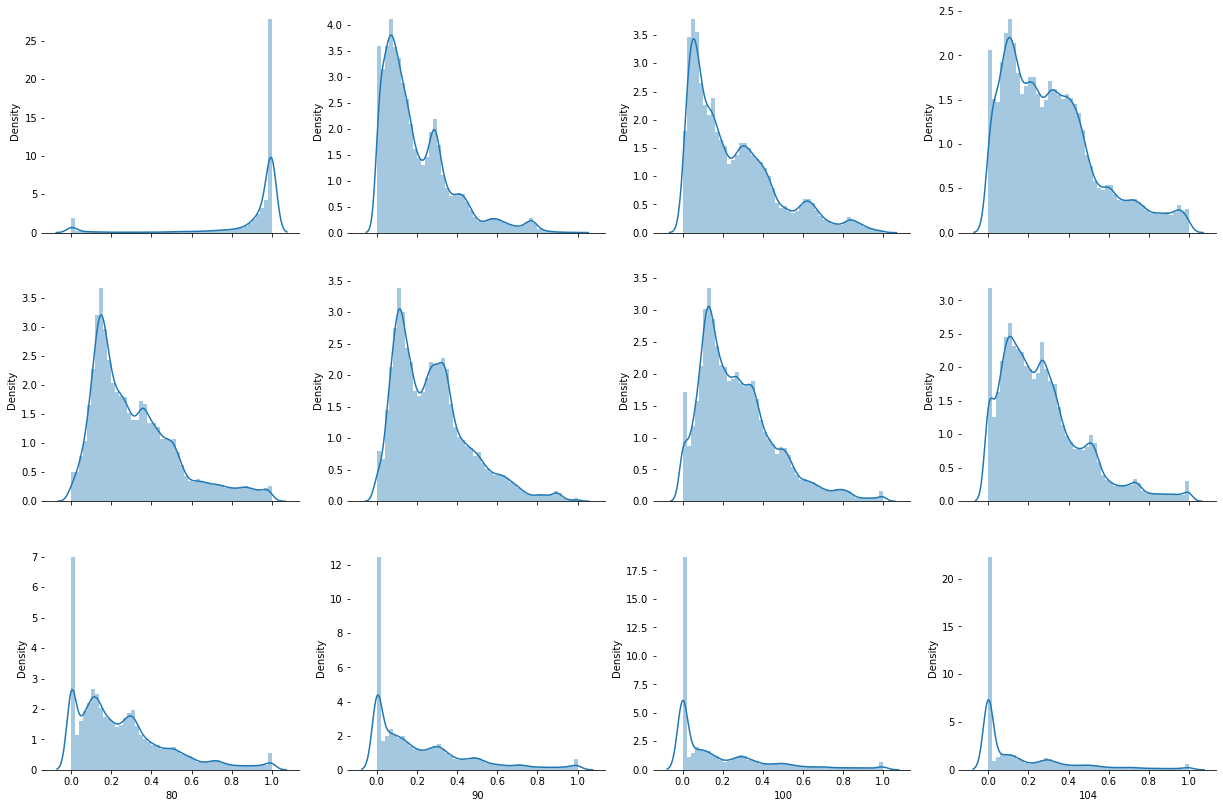

In [82]:
## creating distribution plots of variables with intervals
f, axes = plt.subplots(3, 4, figsize=(21, 14), sharex=True)
sns.despine(left=True)
column_list = [i for i in range(0,105,4)]
figure_rows = [i for i in range(27)]
sns.distplot(x_train[0], ax=axes[0, 0])
sns.distplot(x_train[10], ax=axes[0, 1])
sns.distplot(x_train[20], ax=axes[0, 2])
sns.distplot(x_train[30], ax=axes[0, 3])
sns.distplot(x_train[40], ax=axes[1, 0])
sns.distplot(x_train[50], ax=axes[1, 1])
sns.distplot(x_train[60], ax=axes[1, 2])
sns.distplot(x_train[70], ax=axes[1, 3])
sns.distplot(x_train[80], ax=axes[2, 0])
sns.distplot(x_train[90], ax=axes[2, 1])
sns.distplot(x_train[100], ax=axes[2, 2])
sns.distplot(x_train[104], ax=axes[2, 3])

### Multivariate analysis

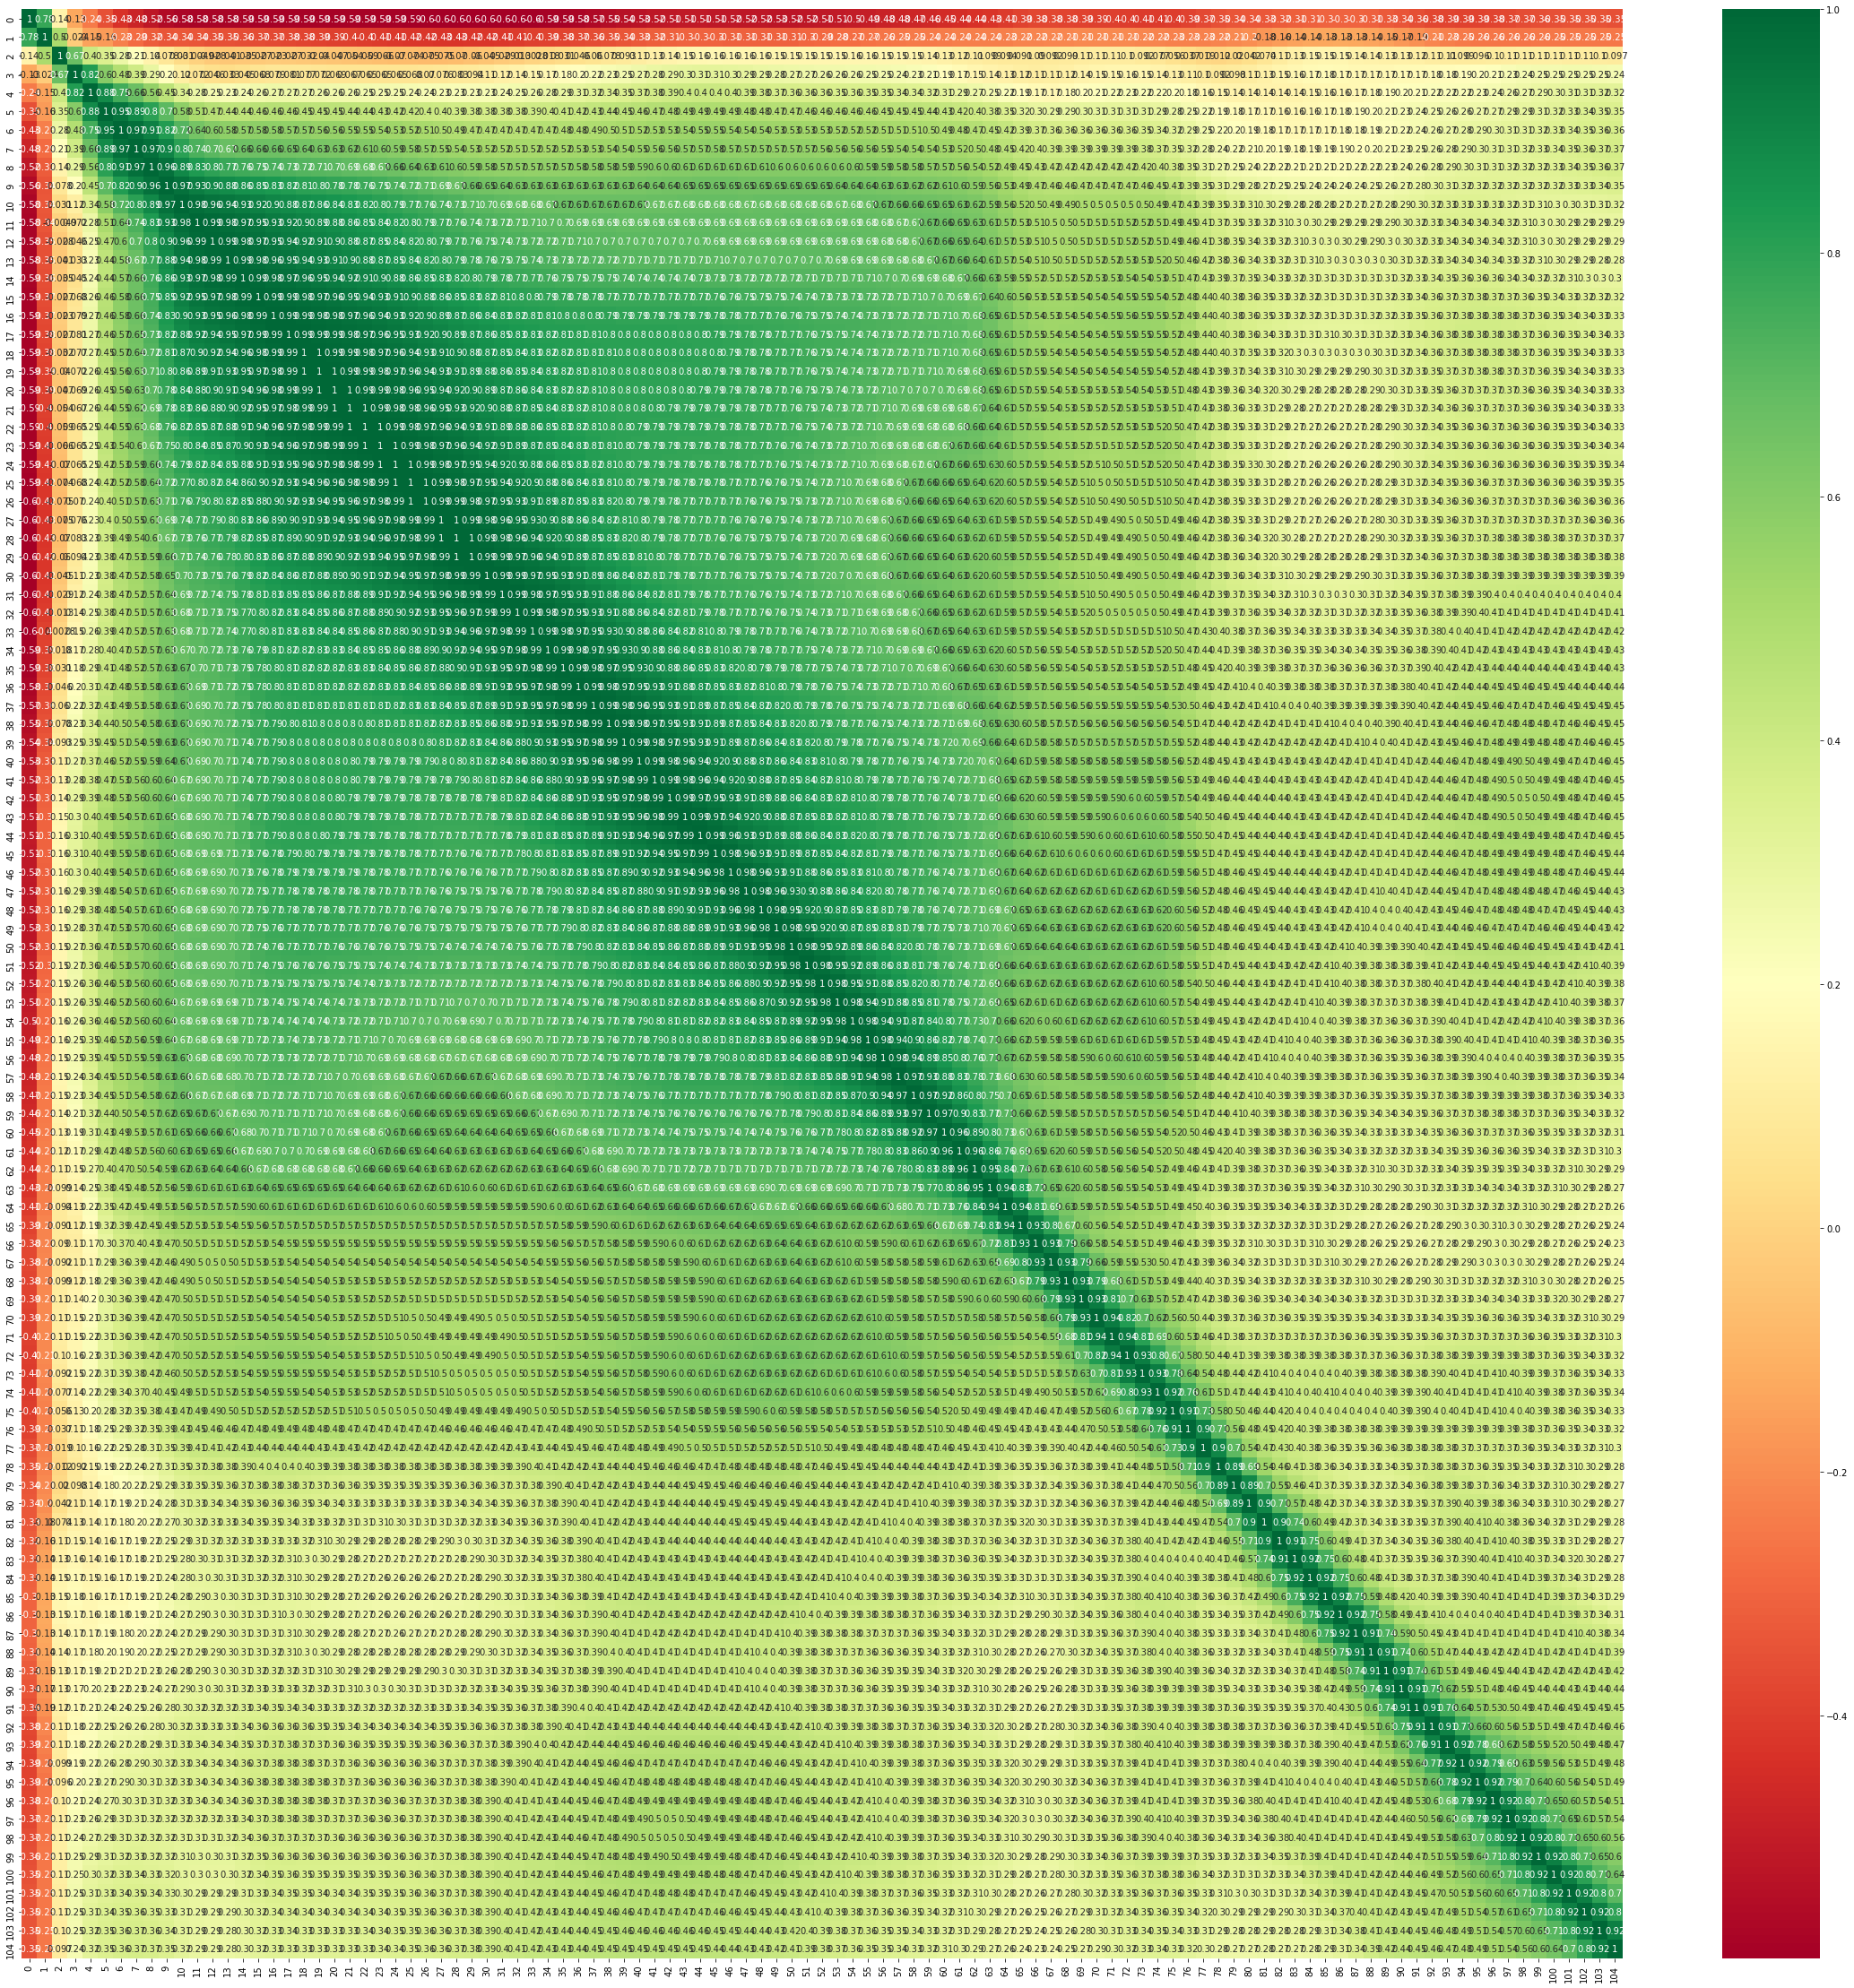

In [24]:
##multivariate analysis heatmap of x_train
corrmat = x_train.corr()
top_corr_feature= corrmat.index
plt.figure(figsize=(30,30))
g= sns.heatmap(x_train[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

columns side by side (eg.- i-1, i and i+1) are highly positive corelated to each other.. this is because the ecg signals are generally connected to each other.

### Class imbalance checking and dealing with it

In [25]:
##checking class imbalance of dependent varibale in train set
pd.DataFrame(y_train).value_counts()

Output
0.0       72471
4.0        6431
2.0        5788
1.0        2223
3.0         641
dtype: int64

In [26]:
##checking class imbalance of dependent varibale in test set
pd.DataFrame(y_test).value_counts()

Output
0.0       18118
4.0        1608
2.0        1448
1.0         556
3.0         162
dtype: int64

There is class imbalance present in both train and test set.

some obeserbations on class imbalance

1. The lowest class has only 641 obeserbations in trainset. so if we do under sampling data will become very small. it will not be able to find the trend in the dataset. so undersampling is not possible.

2. If we train our model with the same data them class 3.0 will learn with only 641 obeserbations but class 0.0 will learn from 72471 obeserbations which will create the model biase towards class 0.0 so model will not be able to give us good predictions.

3. The only option left is to oversample the data. so we are using SMOT (synthetic minority oversampling technique) to oversample the data and make it balanced.

In [27]:
# Data balancing through SMOTE
smote = SMOTE()
# fit predictor and target variable
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [28]:
##checking data balance
print(len(x_train_balanced))
print(len(y_train_balanced))
print(y_train_balanced.value_counts())

362355
362355
0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: Output, dtype: int64


Now the data is balanced

In [29]:
##converting into array
x_train_balanced= x_train_balanced.values
y_train_balanced= np.array(y_train_balanced)

by converting datafarme into array the processing speed increases because array is multi-dimensonal.

# Modelling

### 1. Decision Tree classifier

In [30]:
##making Random Forest Model
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_classifier = DecisionTreeClassifier()
Decision_Tree_classifier.fit(x_train_balanced, y_train_balanced)

DecisionTreeClassifier()

In [31]:
##predicting Result on test set
y_pred_Decision_Tree = Decision_Tree_classifier.predict(x_test)

In [32]:
## converting neumeric labels into string labels form of emp_length

y_pred_Decision_Tree_labeled=[]
for i in range(len(list(y_pred_Decision_Tree))):
    if y_pred_Decision_Tree[i]== 0.0:
        y_pred_Decision_Tree_labeled.append("Normal Sinus Rhythm")
    elif y_pred_Decision_Tree[i]== 1.0:
        y_pred_Decision_Tree_labeled.append("Supraventricular premature beat")
    elif y_pred_Decision_Tree[i]== 2.0:
        y_pred_Decision_Tree_labeled.append("Premature ventricular contraction")
    elif y_pred_Decision_Tree[i]== 3.0:
        y_pred_Decision_Tree_labeled.append("Fusion of ventricular and normal beat")
    else:
        y_pred_Decision_Tree_labeled.append("Unknown Beat")

In [33]:
##checking the value count of predicted outcome
pd.DataFrame(y_pred_Decision_Tree_labeled).value_counts()

Normal Sinus Rhythm                      17480
Unknown Beat                              1682
Premature ventricular contraction         1606
Supraventricular premature beat            849
Fusion of ventricular and normal beat      275
dtype: int64

In [34]:
##finding accuracy and making confusion matrix
cm_Decision_Tree = confusion_matrix(y_test, y_pred_Decision_Tree)
print(cm_Decision_Tree)
print("Accuracy: ",accuracy_score(y_test, y_pred_Decision_Tree))

[[17178   423   265   125   127]
 [  130   403    11     3     9]
 [   92    16  1292    33    15]
 [   29     0    20   112     1]
 [   51     7    18     2  1530]]
Accuracy:  0.93710031061575


In [35]:
##finding precision of all classes
print("precision: ",precision_score(y_test, y_pred_Decision_Tree, average=None))
print("mean precision: ",np.mean(precision_score(y_test, y_pred_Decision_Tree, average=None)))

precision:  [0.98272311 0.47467609 0.80448319 0.40727273 0.90963139]
mean precision:  0.7157573016327471


In [36]:
##finding recall of all classes
print("recall: ",recall_score(y_test, y_pred_Decision_Tree, average=None))
print("mean recall: ",np.mean(recall_score(y_test, y_pred_Decision_Tree, average=None)))

recall:  [0.94811789 0.72482014 0.89226519 0.69135802 0.95149254]
mean recall:  0.8416107586134224


In [57]:
##finding F1 Score of all classes
print("F1 Score: ",f1_score(y_test, y_pred_Decision_Tree, average=None))
print("mean F1 Score: ",np.mean(f1_score(y_test, y_pred_Decision_Tree, average=None)))

F1 Score:  [0.9651104  0.57366548 0.84610347 0.51258581 0.93009119]
mean F1 Score:  0.765511269702579


### 2. Random Forest Classifier

In [37]:
##making Random Forest Model
Random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Random_forest_classifier.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
##predicting Result on test set
y_pred_random_forest = Random_forest_classifier.predict(x_test)

In [39]:
## converting neumeric labels into string labels form of emp_length

y_pred_random_forest_labeled=[]
for i in range(len(list(y_pred_random_forest))):
    if y_pred_random_forest[i]== 0.0:
        y_pred_random_forest_labeled.append("Normal Sinus Rhythm")
    elif y_pred_random_forest[i]== 1.0:
        y_pred_random_forest_labeled.append("Supraventricular premature beat")
    elif y_pred_random_forest[i]== 2.0:
        y_pred_random_forest_labeled.append("Premature ventricular contraction")
    elif y_pred_random_forest[i]== 3.0:
        y_pred_random_forest_labeled.append("Fusion of ventricular and normal beat")
    else:
        y_pred_random_forest_labeled.append("Unknown Beat")

In [40]:
##checking the value count of predicted outcome
pd.DataFrame(y_pred_random_forest_labeled).value_counts()

Normal Sinus Rhythm                      18241
Unknown Beat                              1570
Premature ventricular contraction         1426
Supraventricular premature beat            497
Fusion of ventricular and normal beat      158
dtype: int64

In [41]:
##finding accuracy and making confusion matrix
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print(cm_random_forest)
print("Accuracy: ",accuracy_score(y_test, y_pred_random_forest))

[[17963    68    52    20    15]
 [  129   424     2     0     1]
 [   75     2  1350    16     5]
 [   27     1    12   122     0]
 [   47     2    10     0  1549]]
Accuracy:  0.9778914672026311


In [42]:
##finding precision of all classes
print("precision: ",precision_score(y_test, y_pred_random_forest, average=None))
print("mean precision: ",np.mean(precision_score(y_test, y_pred_random_forest, average=None)))


precision:  [0.98475961 0.85311871 0.94670407 0.7721519  0.9866242 ]
mean precision:  0.9086716979256627


In [43]:
##finding recall of all classes
print("recall: ",recall_score(y_test, y_pred_random_forest, average=None))
print("mean recall: ",np.mean(recall_score(y_test, y_pred_random_forest, average=None)))

recall:  [0.99144497 0.76258993 0.93232044 0.75308642 0.96330846]
mean recall:  0.8805500438724462


In [56]:
##finding F1 Score of all classes
print("F1 Score: ",f1_score(y_test, y_pred_random_forest, average=None))
print("mean F1 Score: ",np.mean(f1_score(y_test, y_pred_random_forest, average=None)))

F1 Score:  [0.98809098 0.80531814 0.9394572  0.7625     0.97482694]
mean F1 Score:  0.8940386515872406


### 3. Support  Vector Machine

In [44]:
##making Support Vector Machine Model
Support_Vector_classifier = SVC(kernel = "poly")
Support_Vector_classifier.fit(x_train_balanced, y_train_balanced)

SVC(kernel='poly')

In [45]:
##predicting Result on test set
y_pred_Support_Vector = Support_Vector_classifier.predict(x_test)

In [46]:
## converting neumeric labels into string labels form of emp_length
y_pred_Support_Vector_labeled=[]
for i in range(len(list(y_pred_Support_Vector))):
    if y_pred_Support_Vector[i]== 0.0:
        y_pred_Support_Vector_labeled.append("Normal Sinus Rhythm")
    elif y_pred_Support_Vector[i]== 1.0:
        y_pred_Support_Vector_labeled.append("Supraventricular premature beat")
    elif y_pred_Support_Vector[i]== 2.0:
        y_pred_Support_Vector_labeled.append("Premature ventricular contraction")
    elif y_pred_Support_Vector[i]== 3.0:
        y_pred_Support_Vector_labeled.append("Fusion of ventricular and normal beat")
    else:
        y_pred_Support_Vector_labeled.append("Unknown Beat")

In [47]:
##checking the value count of predicted outcome
pd.DataFrame(y_pred_Support_Vector_labeled).value_counts()

Normal Sinus Rhythm                      17280
Unknown Beat                              1598
Premature ventricular contraction         1542
Supraventricular premature beat           1049
Fusion of ventricular and normal beat      423
dtype: int64

In [48]:
##finding accuracy and making confusion matrix
cm_Support_Vector = confusion_matrix(y_test, y_pred_Support_Vector)
print(cm_Support_Vector)
print("Accuracy: ",accuracy_score(y_test, y_pred_Support_Vector))

[[17105   577   160   245    31]
 [   93   449    11     2     1]
 [   52    13  1352    30     1]
 [    8     1     9   144     0]
 [   22     9    10     2  1565]]
Accuracy:  0.9416681892928924


In [49]:
##finding precision of all classes
print("precision: ",precision_score(y_test, y_pred_Support_Vector, average=None))
print("mean precision: ",np.mean(precision_score(y_test, y_pred_Support_Vector, average=None)))

precision:  [0.98987269 0.42802669 0.8767834  0.34042553 0.97934919]
mean precision:  0.7228914987710123


In [50]:
##finding recall of all classes
print("recall: ",recall_score(y_test, y_pred_Support_Vector, average=None))
print("mean recall: ",np.mean(recall_score(y_test, y_pred_Support_Vector, average=None)))

recall:  [0.94408875 0.80755396 0.93370166 0.88888889 0.97325871]
mean recall:  0.9094983922334947


In [55]:
##finding F1 Score of all classes
print("F1 Score: ",f1_score(y_test, y_pred_Support_Vector, average=None))
print("mean F1 Score: ",np.mean(f1_score(y_test, y_pred_Support_Vector, average=None)))

F1 Score:  [0.96643878 0.55950156 0.90434783 0.49230769 0.97629445]
mean F1 Score:  0.7797780611578596


After creating different models we find out that random forest model give the best output.. we can take this model for further process..

# Combining output in one DataFrame

In [51]:
combined_output = pd.DataFrame(list(zip(y_test,y_pred_Decision_Tree,y_pred_random_forest,y_pred_Support_Vector)),columns=["Actual_output","Decision_Tree_output","Random_Forest_Output","Support_Vector_Mcahine_Output"])

In [52]:
combined_output.head()

,Actual_output,Decision_Tree_output,Random_Forest_Output,Support_Vector_Mcahine_Output
0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [59]:
combined_output.to_csv("Fourth_Frontier_combined_results.csv",index=False)

# Exporting / Dumping Models

In [53]:
##exporting the model
pickle.dump(Decision_Tree_classifier, open('ECG_Signal_Classification_Decision_Tree_model.pkl', 'wb'))
pickle.dump(Random_forest_classifier, open('ECG_Signal_Classification_Random_Forest_model.pkl', 'wb'))
pickle.dump(Support_Vector_classifier, open('ECG_Signal_Classification_Support_Vector_model.pkl', 'wb'))